- **MolecularWeightSplit** 
- **StratifiedDistributionSplit** 

In [1]:
%load_ext autoreload
%autoreload 2

import datamol as dm
import splito

from utils import visualize_chemspace

## MolecularWeightSplit

Splits the dataset by sorting the molecules by their molecular weight and then finding an appropriate cutoff to split the molecules in two sets. The **application use-case** is to train a model which is able to learn the SAR from small molecules and aim to generalize the larger molecules. 

In [9]:
# load dataset
data = dm.data.chembl_drugs()
data.head(5)

,smiles
0,Br.CC(N)Cc1ccc(O)cc1
1,Br.CC(NC(C)(C)C)C(=O)c1cccc(Cl)c1
2,Br.CC1C2Cc3ccc(O)cc3C1(C)CCN2CCc1ccccc1
3,Br.CCN(c1cc(-c2ccc(CN3CCOCC3)cc2)cc(C(=O)NCc2c...
4,Br.CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21


In [10]:
splitter = splito.MolecularWeightSplit(test_size=0.2, random_state=111, generalize_to_larger=True)
train_idx, test_idx = next(splitter.split(X=data.smiles.tolist()))
assert train_idx.shape[0] > test_idx.shape[0]

data.loc[train_idx, "MolecularWeightSplit"] = "train"
data.loc[test_idx, "MolecularWeightSplit"] = "test"

2023-09-22 08:59:53.879 | WARNING  | splito._molecular_weight:_iter_indices:66 - n_splits=5 > 1, but MolecularWeightSplit is deterministic and will always return the same split!


In [11]:
data["mw"] = data.smiles.apply(lambda smi: dm.descriptors.mw(dm.to_mol(smi)))

MolecularWeightSplit
test     Axes(0.125,0.11;0.775x0.77)
train    Axes(0.125,0.11;0.775x0.77)
Name: mw, dtype: object

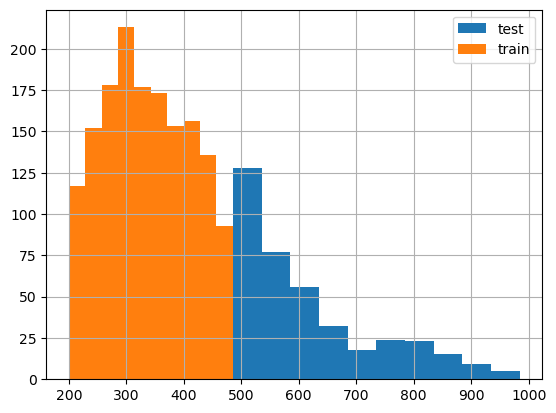

In [12]:
data.groupby(by="MolecularWeightSplit")["mw"].hist(legend=True)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

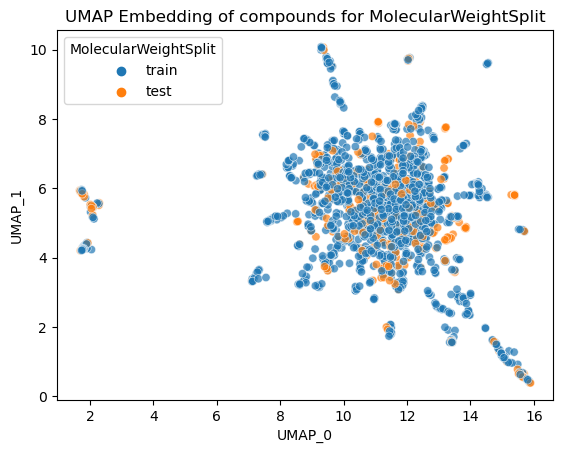

In [13]:
visualize_chemspace(data, split_names=["MolecularWeightSplit"])

## StratifiedDistributionSplit

Split a dataset using the values of a readout, so both train, test and valid have the same distribution of values. Instead of binning using some kind of interval, we will instead use a 1D clustering of the readout.

In [14]:
# load dataset
data = dm.data.freesolv()
data.head(5)

,iupac,smiles,expt,calc
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917


In [15]:
splitter = splito.StratifiedDistributionSplit(test_size=0.2, random_state=111)
train_idx, test_idx = next(splitter.split(X=data["smiles"].tolist(), y=data.expt.tolist()))
assert train_idx.shape[0] > test_idx.shape[0]

data.loc[train_idx, "StratifiedDistributionSplit"] = "train"
data.loc[test_idx, "StratifiedDistributionSplit"] = "test"

**Check the distributions of train/test set**

StratifiedDistributionSplit
test     Axes(0.125,0.11;0.775x0.77)
train    Axes(0.125,0.11;0.775x0.77)
Name: expt, dtype: object

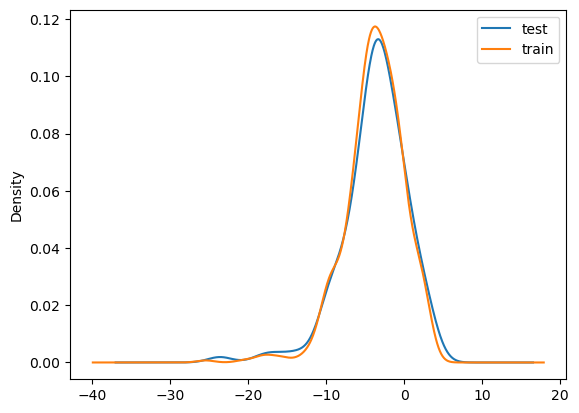

In [16]:
data.groupby(by="StratifiedDistributionSplit")["expt"].plot.density(legend=True)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

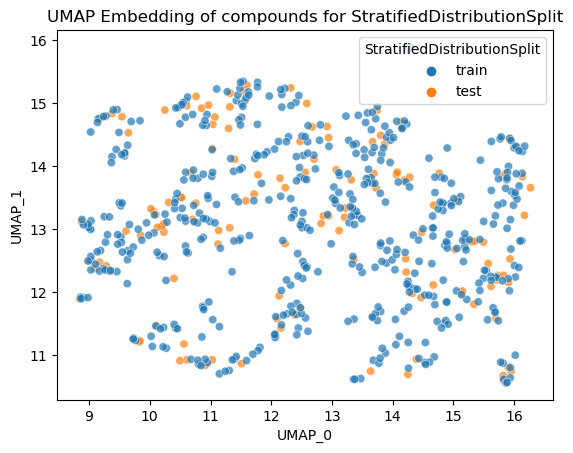

In [17]:
visualize_chemspace(data, split_names=["StratifiedDistributionSplit"])

---

- The End :-)